In [1]:
#Project One APIs
!pip install quandl
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.pyplot as plt
import json
import quandl
from pprint import pprint


In [2]:
#House Price Index - Boulder, CO
#Had to modify URL with start & end dates
Boulder_URL = "https://www.quandl.com/api/v3/datasets/FMAC/HPI_14500.json?kVegd86TY3SQ2hMHSkRJ=kVegd86TY3SQ2hMHSkRJ&start_date=2016-04-26&end_date=2020-08-31"
response_boulder = requests.get(Boulder_URL).json()
#response_boulder

In [3]:
#House Price Index - Denver-Aurora-Lakewood, CO
#Had to modify URL with start & end dates
Denver_URL = "https://www.quandl.com/api/v3/datasets/FMAC/HPI_19740.json?kVegd86TY3SQ2hMHSkRJ=kVegd86TY3SQ2hMHSkRJ&start_date=2016-04-26&end_date=2020-08-31"
response_denver = requests.get(Denver_URL).json()
#response_denver

In [4]:
#House Price Index - Fort Collins, CO
#Had to modify URL with start & end dates
Foco_URL = "https://www.quandl.com/api/v3/datasets/FMAC/HPI_22660.json?kVegd86TY3SQ2hMHSkRJ=kVegd86TY3SQ2hMHSkRJ&start_date=2016-04-26&end_date=2020-08-31"
response_foco = requests.get(Foco_URL).json()
#response_foco

In [5]:
#House Price Index - Colorado Springs, CO
#Had to modify URL with start & end dates
COS_URL = "https://www.quandl.com/api/v3/datasets/FMAC/HPI_17820.json?kVegd86TY3SQ2hMHSkRJ=kVegd86TY3SQ2hMHSkRJ&start_date=2016-04-26&end_date=2020-08-31"
response_cos = requests.get(COS_URL).json()
#response_cos

In [6]:
#House Price Index - Pueblo, CO
#Had to modify URL with start & end dates
Pueblo_URL = "https://www.quandl.com/api/v3/datasets/FMAC/HPI_39380.json?kVegd86TY3SQ2hMHSkRJ=kVegd86TY3SQ2hMHSkRJ&start_date=2016-04-26&end_date=2020-08-31"
response_pueblo = requests.get(Pueblo_URL).json()
#response_pueblo

In [7]:
#House Price Index - Greeley, CO
#Had to modify URL with start & end dates
Greeley_URL = "https://www.quandl.com/api/v3/datasets/FMAC/HPI_24540.json?kVegd86TY3SQ2hMHSkRJ=kVegd86TY3SQ2hMHSkRJ&start_date=2016-04-26&end_date=2020-08-31"
response_greeley = requests.get(Greeley_URL).json()
response_greeley

{'dataset': {'id': 44615191,
  'dataset_code': 'HPI_24540',
  'database_code': 'FMAC',
  'name': 'House Price Indices - Greeley CO',
  'description': 'The FMHPI provides a measure of typical price inflation for houses within the U.S. Values are calculated monthly but are released at the end of the following quarter. For example, the FMHPI for October, November, and December are published in late February of the following year. Series are available at three levels of geographical aggregation: Metropolitan Statistical Area (MSA), state, and national. All series begin in January, 1975. The national index is defined as a weighted average of the 50 state indexes and Washington, DC. The FMHPI is based on an ever expanding database of loans purchased by either Freddie Mac or Fannie Mae.<br><br>Dataset codes for cities are based on CBSA codes (Core-Based Statistical Areas) which are defined in the Quandl documentation. Values are presented as both Not Seasonally Adjusted (NSA) and Seasonally A

In [18]:
#Creating DataFrame for each city & renaming columns
values_Boulder = pd.DataFrame(response_boulder["dataset"]["data"])
values_Boulder = values_Boulder.rename(columns={0:"Date",1:"Boulder NSA Value",2:"Boulder SA Value"})

values_Denver = pd.DataFrame(response_denver["dataset"]["data"])
values_Denver = values_Denver.rename(columns={0:"Date",1:"Denver NSA Value",2:"Denver SA Value"})

values_Foco = pd.DataFrame(response_foco["dataset"]["data"])
values_Foco = values_Foco.rename(columns={0:"Date",1:"Fort Collins NSA Value",2:"Fort Collins SA Value"})

values_COS = pd.DataFrame(response_cos["dataset"]["data"])
values_COS = values_COS.rename(columns={0:"Date",1:"CO Springs NSA Value",2:"CO Springs SA Value"})

values_Pueblo = pd.DataFrame(response_pueblo["dataset"]["data"])
values_Pueblo = values_Pueblo.rename(columns={0:"Date",1:"Pueblo NSA Value",2:"Pueblo SA Value"})

values_Greeley = pd.DataFrame(response_greeley["dataset"]["data"])
values_Greeley = values_Greeley.rename(columns={0:"Date",1:"Greeley NSA Value",2:"Greeley SA Value"})

#Need to merge two at a time
values_merged = pd.merge(values_Boulder, values_Denver,how="outer",on="Date")
#values_merged            
values_merged2 = pd.merge(values_Foco, values_COS,how="outer",on="Date")
# values_merged2
values_merged3 = pd.merge(values_Pueblo, values_Greeley,how="outer",on="Date")
# values_merged3
values_merged4 = pd.merge(values_merged, values_merged2, how="outer", on="Date")
# values_merged4
values_merged_final = pd.merge(values_merged4, values_merged3, how="outer",on="Date")
# values_merged_final
values_merged_final_sorted = values_merged_final.sort_values(by=['Date'],ascending=True)
values_merged_final_sorted

,Date,Boulder NSA Value,Boulder SA Value,Denver NSA Value,Denver SA Value,Fort Collins NSA Value,Fort Collins SA Value,CO Springs NSA Value,CO Springs SA Value,Pueblo NSA Value,Pueblo SA Value,Greeley NSA Value,Greeley SA Value
52,2016-04-30,177.124104,174.529911,173.565366,170.981956,172.334074,170.030227,146.570118,144.560718,128.990006,127.336255,155.711631,153.822891
51,2016-05-31,180.073080,176.453585,176.296115,172.774581,175.451967,172.149943,148.803584,145.968717,130.791008,128.393702,158.226288,155.474568
50,2016-06-30,182.083760,178.105467,178.072329,174.273305,177.690198,174.005849,150.259985,147.128638,132.036022,129.335147,159.998211,156.884149
49,2016-07-31,183.083165,179.530999,178.918516,175.545893,178.911871,175.548211,150.897598,148.064187,132.666800,130.177467,160.985470,158.080666
48,2016-08-31,183.488071,180.840608,179.242768,176.834470,179.458902,176.996241,151.038566,148.985488,132.946839,131.118892,161.478616,159.314301
47,2016-09-30,183.690642,182.426039,179.377260,178.243846,179.747741,178.472332,150.973559,149.998197,133.066591,132.088651,161.721508,160.529667
46,2016-10-31,183.990926,183.867832,179.619810,179.606754,180.051115,179.868827,150.979562,150.970649,133.224630,133.080138,162.002672,161.763053
45,2016-11-30,184.316482,185.343541,179.960893,181.068833,180.354760,181.340933,151.071346,152.040924,133.434651,134.172697,162.342724,163.116876
44,2016-12-31,185.258313,186.840233,180.996287,182.639955,181.294839,182.898848,151.767932,153.252168,134.122529,135.345075,163.231666,164.548932
43,2017-01-31,187.137025,188.123139,183.040194,184.011051,183.219497,184.319283,153.373300,154.348766,135.521930,136.401588,164.942842,165.861307


Text(0.5, 1.0, 'NSA Values By City')

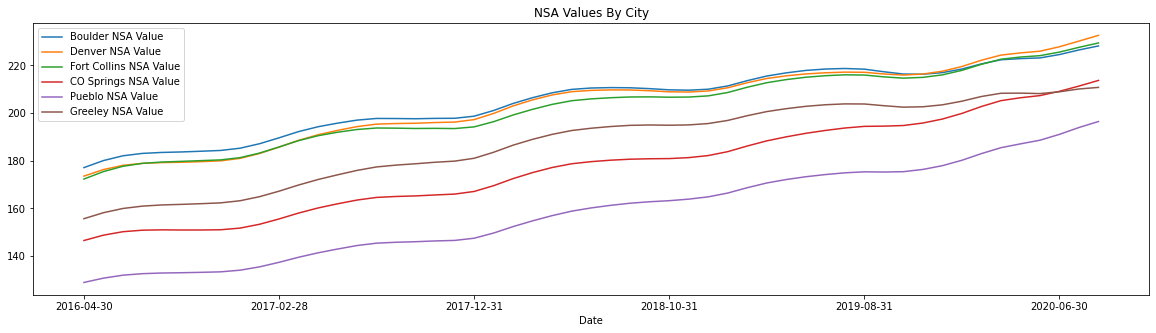

In [23]:
#Graphing the NSA Values by Date

values_merged_final_sorted.plot(x="Date", y=["Boulder NSA Value","Denver NSA Value","Fort Collins NSA Value","CO Springs NSA Value","Pueblo NSA Value","Greeley NSA Value"], figsize=(20,5))
plt.title("NSA Values By City")                                
           
# Values are presented as both Not Seasonally Adjusted (NSA) and Seasonally Adjusted (SA)
                                

Text(0.5, 1.0, 'SA Values By City')

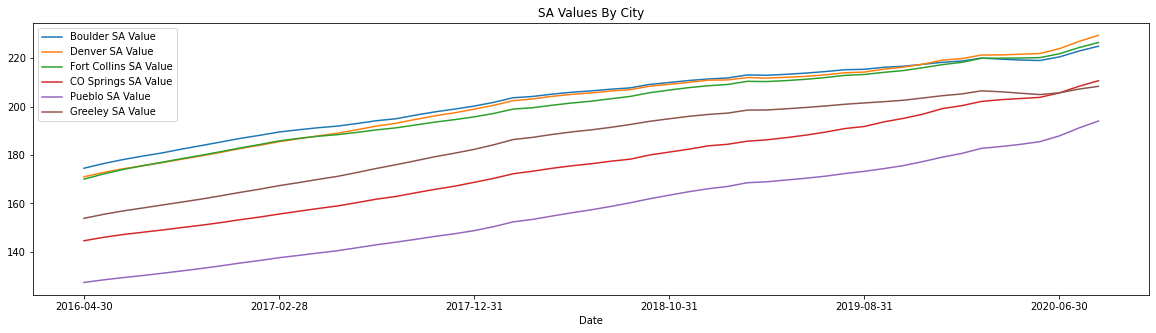

In [24]:
#Graphing the SA Values by Date

values_merged_final_sorted.plot(x="Date", y=["Boulder SA Value","Denver SA Value","Fort Collins SA Value","CO Springs SA Value","Pueblo SA Value","Greeley SA Value"], figsize=(20,5))
plt.title("SA Values By City")

# Values are presented as both Not Seasonally Adjusted (NSA) and Seasonally Adjusted (SA)